Importação de bibliotecas

In [42]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

Requisição do site dos campeões

In [28]:
def get_links():
    base_url = "https://www.leagueoflegends.com/"
    url = f"{base_url}/pt-br/champions/"

    response = requests.get(url)
    soup_champions = BeautifulSoup(response.text)

    ancoras = (soup_champions.find("div", class_="sc-e560e08e-0 hPhkGD")
                             .find_all("a"))
    
    links = [base_url + i["href"] for i in ancoras]
    return links

In [29]:
def get_content(url):
    response = requests.get(url)
    return response

Pega o nome do champion

In [30]:
def get_champion_name(soup):

    div_name = soup.find("div", class_="sc-d4b4173b-0 jHxzVw")
    name = div_name.text
    return name

Pega a descrição

In [31]:
def get_champion_desc(soup):

    div_desc = soup.find("div", class_="sc-bc031955-0 fofXPf")
    desc = div_desc.text
    return desc

Pega a função e dificuldade

In [32]:
def get_funcao(soup):

    div_func_dif = soup.find("div", class_="character-meta-container")

    roles = div_func_dif.find("div", class_="character-meta-box-wrapper roles").find("div", "meta-description").find_all("p")[1]
    role = roles.text
    return role


In [33]:
def get_dificuldade(soup):
    div_func_dif = soup.find("div", class_="character-meta-container")

    dif = div_func_dif.find("div", class_="character-meta-box-wrapper difficulty").find("div", "meta-description").find_all("p")[1]
    dif = dif.text
    return dif

Pega as habilidades


In [34]:
def get_skills(soup):

    div_habilidades = soup.find("div", "icon-tab--tabs")
    ol = div_habilidades.find("ol")
    lis = ol.find_all("li")
    skills = [i.text for i in lis]
    
    return skills

Pega as skins

In [35]:
def get_skins(soup):

    div_skins = soup.find("div", "sc-6bee9aac-0 lctKhT width-medium")
    ol = div_skins.find("ol")
    lis = ol.find_all("li")
    skins = [i.text for i in lis[1:]]
    
    return skins

Junta tudo e coloca em um array

In [36]:
def get_champion_info(url):

    response = get_content(url)
    if response.status_code != 200:
        print("Não foi possivel obter os dados")
        return {}
    
    else:
        soup = BeautifulSoup(response.text)
        data = {}
        data["Name"] = get_champion_name(soup)
        data["Descrição"] = get_champion_desc(soup)
        data["Função"] = get_funcao(soup)
        data["Dificuldade"] = get_dificuldade(soup)
        data["Skills"] = get_skills(soup)
        data["Skins"] = get_skins(soup)
        return data

Faz para todos os champions e coloca em um array

In [37]:
links = get_links()

data = []

for i in links: 
    d = get_champion_info(i)
    d["Link"] = i
    data.append(d)


Utilizando Pandas é possível ver o DataFrame

In [38]:
df = pd.DataFrame(data)

df

,Name,Descrição,Função,Dificuldade,Skills,Skins,Link
0,Aatrox,Antes defensores honrados de Shurima contra o ...,Lutador,Média,"[Postura do Arauto da Morte, A Espada Darkin, ...","[Aatrox Justiceiro, Mech Aatrox, Aatrox Caçado...",https://www.leagueoflegends.com//pt-br/champio...
1,Ahri,A ligação de Ahri com a magia do mundo espirit...,Mago / Assassino,Média,"[Furto de Essência, Orbe da Ilusão, Fogo de Ra...","[Ahri da Dinastia, Ahri Noturna, Ahri Raposa F...",https://www.leagueoflegends.com//pt-br/champio...
2,Akali,Abandonando a Ordem Kinkou e seu título de Pun...,Assassino,Média,"[Marca do Assassino, Golpe dos Cinco Pontos, P...","[Akali Sinistra, Akali Infernal, Akali Esporti...",https://www.leagueoflegends.com//pt-br/champio...
3,Akshan,"Akshan ri da cara do perigo, lutando contra o ...",Atirador / Assassino,Baixa,"[Lutando Sujo, Bumerangue Vingativo, Rebeldia,...","[Akshan Ciberpop, Akshan Rosa de Cristal, Aksh...",https://www.leagueoflegends.com//pt-br/champio...
4,Alistar,Um poderoso guerreiro com uma temível reputaçã...,Tanque / Suporte,Média,"[Urro Triunfante, Pulverizar, Cabeçada, Atrope...","[Alistar Negro, Alistar Dourado, Alistar Toure...",https://www.leagueoflegends.com//pt-br/champio...
...,...,...,...,...,...,...,...
163,Zeri,Uma jovem obstinada e vivaz da classe operária...,Atirador,Média,"[Bateria Viva, Rajada Reluzente, Laser de Ultr...","[Zeri Rosa Definhada, Zeri Canção do Oceano, Z...",https://www.leagueoflegends.com//pt-br/champio...
164,Ziggs,"O yordle Ziggs, amante de grandes bombas e pav...",Mago,Média,"[Pavio Curto, Bomba Saltitante, Carga Concentr...","[Ziggs Cientista Louco, Major Ziggs, Ziggs Cur...",https://www.leagueoflegends.com//pt-br/champio...
165,Zilean,"Outrora um poderoso mago icathiano, Zilean se ...",Suporte / Mago,Média,"[Tempo Engarrafado, Bomba-relógio, Retroceder,...","[Zilean Velho Noel, Zilean Maluco Beleza, Zile...",https://www.leagueoflegends.com//pt-br/champio...
166,Zoe,"Como a personificação da travessura, imaginaçã...",Mago,Média,"[Brililim!, Estrela Desviada!, Roubo Arcano, B...","[Zoe Ciberpop, Zoe Curtindo o Verão, Zoe Guard...",https://www.leagueoflegends.com//pt-br/champio...


Transfoma em um arquivo CSV

In [39]:
df.to_csv("data_lol.csv", index=False, sep=";")

Análise de algumas estatísticas

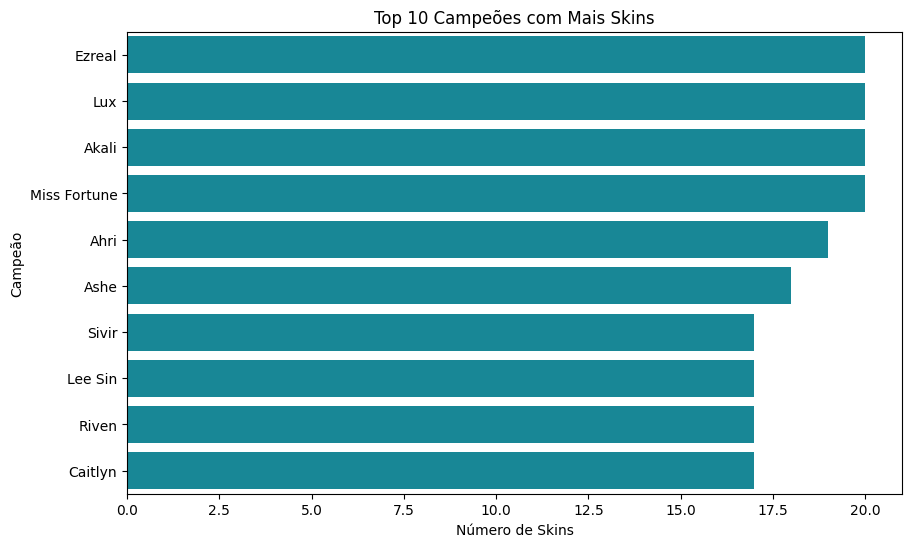

In [74]:
import ast

df = pd.read_csv("data_lol.csv", sep=";")

# Converte a coluna 'Skins' de string para lista
df['Skins'] = df['Skins'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])

# Adiciona coluna para o número de skins
df['Número de Skins'] = df['Skins'].apply(len)

# Ordena e seleciona os top 10 campeões
top_10_skins = df.sort_values(by='Número de Skins', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Número de Skins', y='Name', data=top_10_skins, color="#0397AB")
plt.title('Top 10 Campeões com Mais Skins')
plt.xlabel('Número de Skins')
plt.ylabel('Campeão')
plt.show()


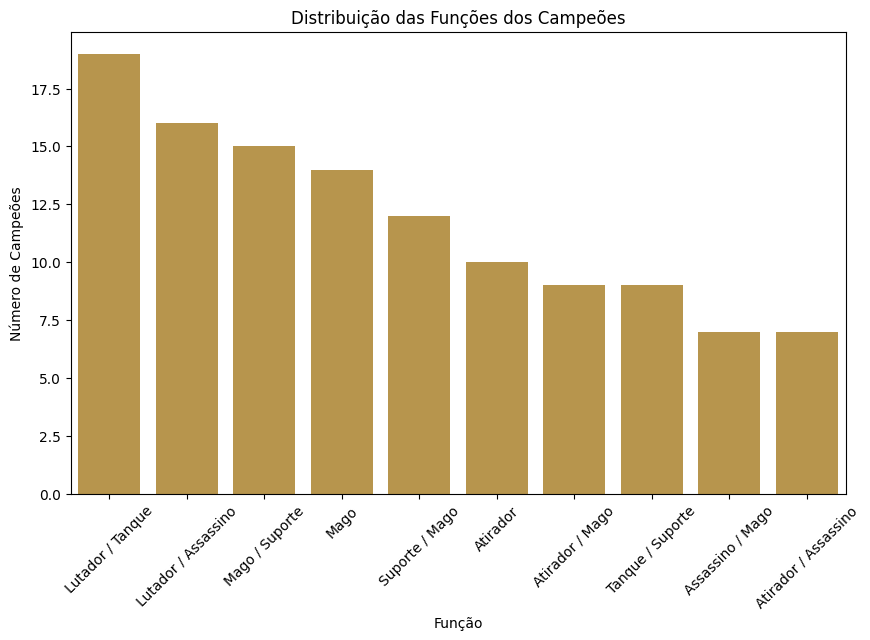

In [75]:
funcao_count = df['Função'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=funcao_count.index, y=funcao_count.values, color='#C89B3C')
plt.title('Distribuição das Funções dos Campeões')
plt.xlabel('Função')
plt.ylabel('Número de Campeões')
plt.xticks(rotation=45)
plt.show()

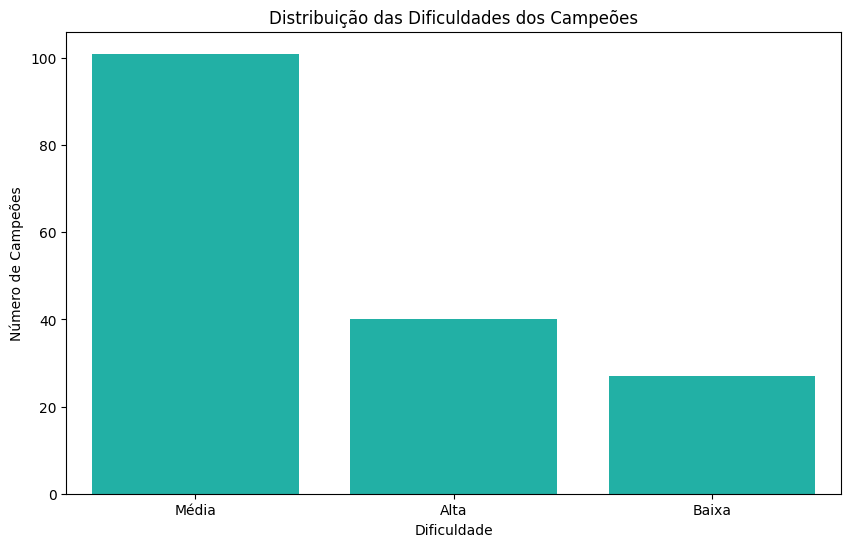

In [76]:
dificuldade_count = df['Dificuldade'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=dificuldade_count.index, y=dificuldade_count.values, color='#0AC8B9')
plt.title('Distribuição das Dificuldades dos Campeões')
plt.xlabel('Dificuldade')
plt.ylabel('Número de Campeões')
plt.show()